### [데이터 분석] <hr>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
d_path = './total4.csv'
df = pd.read_csv(d_path)
df.head()

# 기존 데이터 확인
print("제거 전 데이터 개수:", len(df))

# 이상치 제거 조건
df = df[(df['복합연비'] <= 40) & (df['복합연비'] >= 3)]

print("제거 후 데이터 개수:", len(df))


df = df.dropna(subset=['복합연비', '연비_y'])

제거 전 데이터 개수: 998
제거 후 데이터 개수: 992


,주행,가격,거주성,품질,디자인,연비_y
주행,1.000000,0.090828,0.331821,0.673578,0.641627,0.082561
가격,0.090828,1.000000,0.023963,0.086293,0.013793,0.150374
거주성,0.331821,0.023963,1.000000,0.494607,0.255872,0.168819
품질,0.673578,0.086293,0.494607,1.000000,0.561567,0.100950
디자인,0.641627,0.013793,0.255872,0.561567,1.000000,0.051178
연비_y,0.082561,0.150374,0.168819,0.100950,0.051178,1.000000


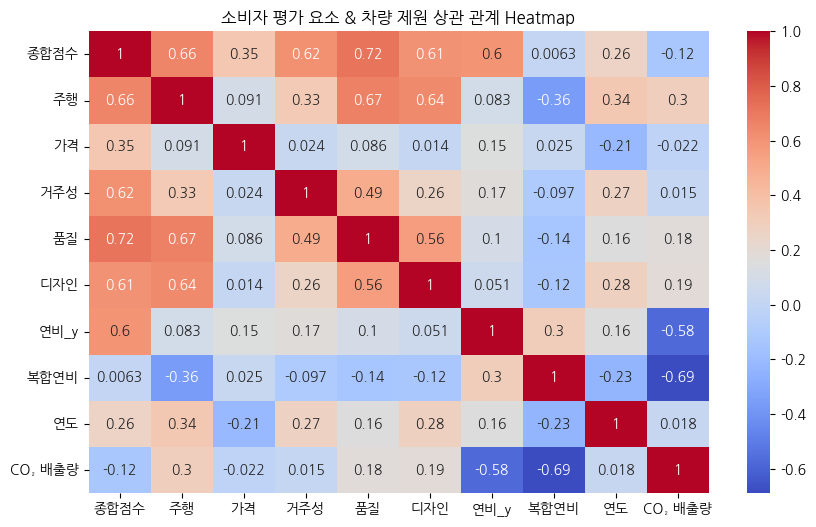

In [3]:
## 상관분석 및 시각화
display(df[['주행','가격','거주성','품질','디자인','연비_y']].corr())

df.columns[1:]

plt.figure(figsize=(10,6))
sns.heatmap(df[df.columns[1:]].corr(numeric_only=True),
            annot=True, cmap='coolwarm')
plt.title("소비자 평가 요소 & 차량 제원 상관 관계 Heatmap")
plt.show()

##### 분석1. 소비자 평가요소 / 차량 제원의 상관관계 
- 상관관계
    - 연비와 co2배출량은 음의 강한 상관관계 -> 연비가 좋을 수록 co2배출량이 떨어짐 => 차 잘 만듬 ㄹㅇ ㅋㅋ
    - 비교적 품질, 디자인, 주행이 서로 높은 상관관계를 보여준다. => 이것은 성능이 전부가 아닌  감성 품질은 요한다는 것을 알 수 있음
    - 연비와 복합연비가 높은 상관관계일 줄 알았으나 그렇지 않음 -> 한번 확인 해볼 필요가 있음
    - 가격 (0.35)	약한 상관	비싸도 좋아 보이면 점수가 높을 수 있음 → 감성·브랜드 영향
- 즉, 소비자 만족은 “성능 데이터”보다 “체감 경험”이 더 크게 좌우된다
- 복합연비와 연비평가 : 공식 연비와 체감 연비는 다름

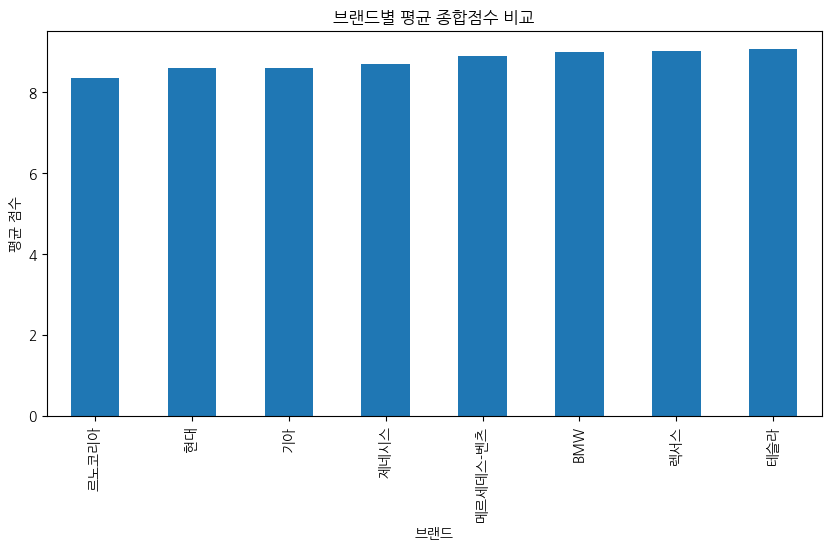

     Unnamed: 0  종합점수   주행   가격  거주성   품질  디자인  연비_y  복합연비  연료    연도       차급  \
1             5   9.0  9.9  8.8  8.7  7.9  9.4   9.3   5.7  전기  2023  대형/프리미엄   
15           28   9.3  9.8  8.9  9.5  8.7  9.5   9.4   5.1  전기  2024  대형/프리미엄   
25           45   9.3  9.8  8.9  9.5  8.7  9.5   9.4   5.1  전기  2023  대형/프리미엄   
51           80   9.0  9.9  8.8  8.7  7.9  9.4   9.3   5.8  전기  2019  대형/프리미엄   
61          103   9.0  9.9  8.8  8.7  7.9  9.4   9.3   6.1  전기  2021  대형/프리미엄   
72          130   9.2  9.9  8.8  9.3  8.4  9.6   9.5   4.5  전기  2021  대형/프리미엄   
132         257   9.2  9.9  8.8  9.3  8.4  9.6   9.5   4.8  전기  2023  대형/프리미엄   
171         323   9.0  9.9  8.8  8.7  7.9  9.4   9.3   5.7  전기  2024  대형/프리미엄   
259         492   9.3  9.8  8.9  9.5  8.7  9.5   9.4   5.6  전기  2021  대형/프리미엄   
287         541   9.2  9.9  8.8  9.3  8.4  9.6   9.5   4.8  전기  2024  대형/프리미엄   
423         756   9.0  9.9  8.8  8.7  7.9  9.4   9.3   5.7  전기  2022  대형/프리미엄   
590        1076   8.8  9.9  

In [4]:
## (A) 브랜드별 평균 소비자 만족도
## → 브랜드 이미지와 실제 소비자 체감 차이 분석

plt.figure(figsize=(10,5))
df.groupby('브랜드')['종합점수'].mean().sort_values().plot(kind='bar')
plt.title("브랜드별 평균 종합점수 비교")
plt.ylabel("평균 점수")
plt.show()


print(df[df['브랜드'] == '테슬라'])

##### 분석2. 브랜드별 소비자 만족도
- 애초에 국내에서 판매량이 많은 브랜드들로 이루어 져있어서 크게 차이 나지 않음
- 인사이트 도출 힘듦

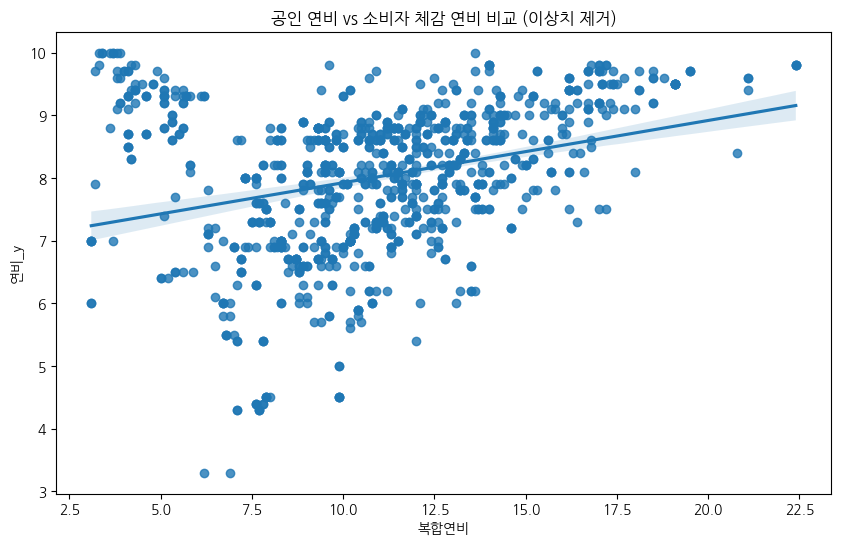

In [5]:
## (C) 연비 체감 vs 복합 연비 산점도

plt.figure(figsize=(10,6))
sns.regplot(x='복합연비', y='연비_y', data=df)
plt.title("공인 연비 vs 소비자 체감 연비 비교 (이상치 제거)")
plt.show()

##### 분석3. 연비 체감 vs 복합 연비 산점도
- 복합연비가 증가할수록 연비 체감 점수(연비_y)도 증가하는 추세
- 기울기가 완만한 양(+)의 상관관계라는 것이 핵심
- 즉, 연비가 높으면 소비자가 연비를 좋게 느끼는 경향은 맞지만, 그 강도는 매우 크지 않다.
- 또한, 자동차의 공식 연비 수치가 좋다고 해서 체감 연비 점수가 반드시 높아지는 건 아니라는 의미.
- 복합연비 10~15 구간 → 점수 변동 폭이 큼 -> 운행 조건, 주행 스타일 등이 체감에도 영향을 준다는 의미로 해석됨
- 복합연비 15 이상 구간에서는 대부분 8점대~9점대

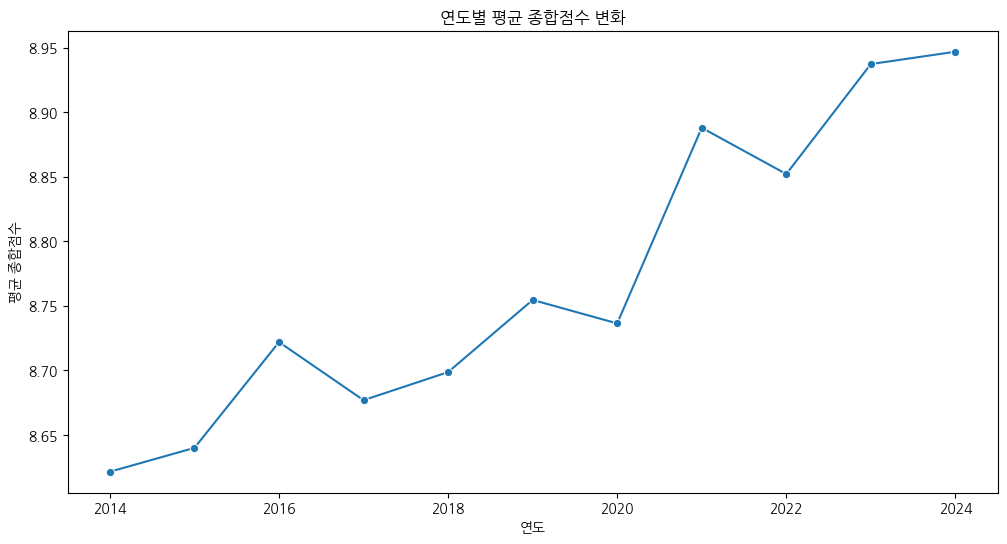

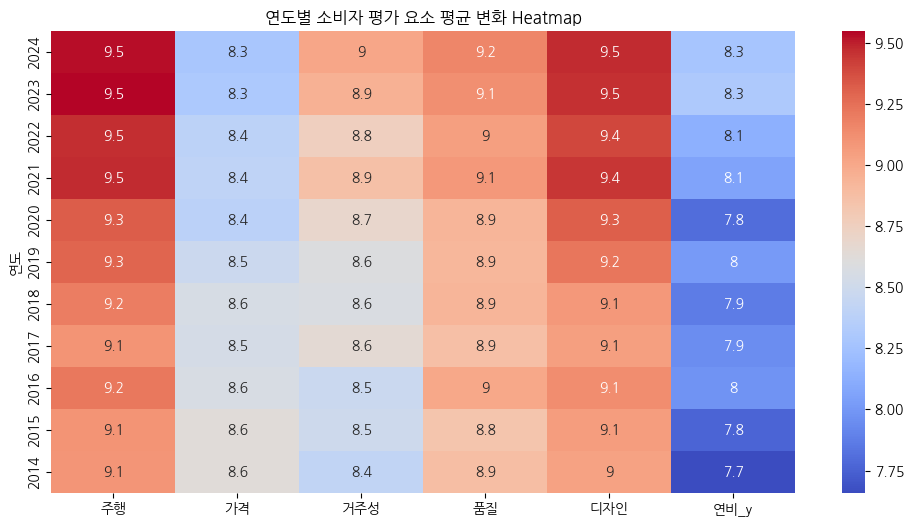

In [6]:
# 🧪 1) 연도별 종합점수 평균 시각화

plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby('연도')['종합점수'].mean().reset_index(), 
             x='연도', y='종합점수', marker='o')

plt.title("연도별 평균 종합점수 변화")
plt.ylabel("평균 종합점수")
plt.show()


## 🧪 2) 연도별 세부 평가 변화 (Heatmap)
score_cols = ['주행', '가격', '거주성', '품질', '디자인', '연비_y']

df_year = (df.groupby('연도')[score_cols].mean().sort_index(ascending=False)   # 🔹연도 역순 정렬 (최근 연도 → 과거)
)

plt.figure(figsize=(12,6))
sns.heatmap(df_year, annot=True, cmap='coolwarm')
plt.title("연도별 소비자 평가 요소 평균 변화 Heatmap")
plt.show()



#####  1. 연도별 평균 종합점수 변화 해석
    - 꾸준히 증가하고 있음
    - 2020 → 2021 구간 상승폭이 크게 나타났는데
    - 전기차/플랫폼 기반 차량 본격 출시, ADAS·인포테인먼트·NVH 개선 등이 시장 전반에 확대된 시기

#### 1.연도별 세부 평가 변화 (Heatmap)
    - 가격 점수 → 완만한 감소 또는 유지 -> '차는 좋아졌지만, 많이 비싸졌다'라는 소비자의 정서가 담겨있음
    - 반면, 연비 만족도는 전기차가 나왔음에도 불구하고 아직까지 높은 상승률은 아님